# Production Budget vs Profit Margin #

An important part to any movie studio is how much they should be spending on their films.

While not the only factor to turning a profit in the movie industry, what is the correlation between production budget and profit margin?

The minimum we expect to answer here is:

### If Microsoft spends x amount more, will profits increase by y? ###

We will explore this question using the data set from the-numbers.com, a Los Angeles based database tracking the numbers that go into major-motion pictures.

### Import relevant libraries ###

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

## Import The Numbers dataset ##

In [2]:
df = pd.read_csv('data/tn.movie_budgets.csv.gz', index_col='id')

In [3]:
print(f"""The first movie in the data set was released in {df['release_date'].min()} while the most recent was released in {df['release_date'].max()}""")

The first movie in the data set was released in Apr 1, 1975 while the most recent was released in Sep 9, 2016


The Numbers dataset contains information on about 5800 films, released from 1975 through 2016.
It is also the only data set to contain the films' budgets and grosses, while containing more relevant information than, say, the Box Office Mojo dataset, which only has about 3500 records.

In [4]:
# A sample of the dataframe
df.sample(3)

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
79,"Sep 18, 2015",La navaja de Don Juan,"$1,200,000","$4,254","$4,254"
19,"Apr 11, 2003","House of 1,000 Corpses","$7,000,000","$12,634,962","$17,005,466"
46,"Feb 7, 1992",Medicine Man,"$40,000,000","$44,948,240","$44,948,240"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


## Data Cleaning and Organization ##

The next step is to clean and organize the data. This involves converting the numbers to floats, removing any "zero" values from the worldwide_gross column, and adding a "year" column.

For the purpose of this dataset, we will be filtering out anything made before the year 2000.

In [6]:
df['production_budget'] = df['production_budget'].map(lambda x: x.strip('$')).str.replace(',','').astype(float)
df['domestic_gross'] = df['domestic_gross'].map(lambda x: x.strip('$')).str.replace(',','').astype(float)
df['worldwide_gross'] = df['worldwide_gross'].map(lambda x: x.strip('$')).str.replace(',','').astype(float)
df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


Now that we have raw numbers as floats, we can start working with our data.

Note: the worldwide_gross column is too large to display its whole numbers, hence the Scientific Notation.

In [7]:
# dropping all "0" values from the worldwide_gross column
df['worldwide_gross'] = df['worldwide_gross'].replace(0, pd.np.nan)
df = df.dropna()

<ipython-input-7-e18349e1590d>:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df['worldwide_gross'] = df['worldwide_gross'].replace(0, pd.np.nan)


Now we'll add three columns:

Profit: this is the raw profit (worldwide gross - production budget).

ROI: this is being used as a "profit margin" column or a "percentage profit" column.

Release Year: What year did this film come out in.

In [8]:
df['profit'] = df['worldwide_gross'] - df['production_budget']

In [9]:
df['roi'] = round(((df['profit']/df['production_budget']) * 100), 2)

In [10]:
df['release_year'] = df['release_date'].map(lambda x: int(x[-4:]))

In [11]:
# let's check our df
df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,roi,release_year
id,,,,,,,,
1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,553.26,2009
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,6.350639e+08,154.67,2011
3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-2.002376e+08,-57.21,2019
4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,1.072414e+09,324.38,2015
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,9.997217e+08,315.37,2017


In [12]:
# quick check of the info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5415 entries, 1 to 82
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       5415 non-null   object 
 1   movie              5415 non-null   object 
 2   production_budget  5415 non-null   float64
 3   domestic_gross     5415 non-null   float64
 4   worldwide_gross    5415 non-null   float64
 5   profit             5415 non-null   float64
 6   roi                5415 non-null   float64
 7   release_year       5415 non-null   int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 380.7+ KB


## Initial Data Analysis ##

Let's check our statistics out and see what they have to tell us.

In [13]:
df.describe()

,production_budget,domestic_gross,worldwide_gross,profit,roi,release_year
count,5.415000e+03,5.415000e+03,5.415000e+03,5.415000e+03,5415.000000,5415.000000
mean,3.330801e+07,4.471128e+07,9.768800e+07,6.437999e+07,412.549117,2003.599446
std,4.248758e+07,6.960989e+07,1.788591e+08,1.498581e+08,3048.742004,12.546965
min,1.100000e+03,0.000000e+00,2.600000e+01,-2.002376e+08,-100.000000,1915.000000
25%,6.000000e+06,3.160708e+06,7.004834e+06,-1.862082e+06,-29.895000,1999.000000
50%,1.900000e+07,2.030022e+07,3.333987e+07,1.190000e+07,88.490000,2006.000000
75%,4.200000e+07,5.578249e+07,1.044590e+08,6.737924e+07,296.875000,2012.000000
max,4.250000e+08,9.366622e+08,2.776345e+09,2.351345e+09,179900.000000,2019.000000


Ok, we can see there is currently 5,415 records. The average production budget is 33m, while the median is 19m.

The Standard Deviation is massive though. Let's start filtering out data.

## Data Filtering ##

In [14]:
# let's start with the year.
# Anything older than the year 2005 will be removed, so we have a 10 year scope, using the last decade.
filtered_df = df[df['release_year'] >= 2005]

In [15]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3070 entries, 1 to 82
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       3070 non-null   object 
 1   movie              3070 non-null   object 
 2   production_budget  3070 non-null   float64
 3   domestic_gross     3070 non-null   float64
 4   worldwide_gross    3070 non-null   float64
 5   profit             3070 non-null   float64
 6   roi                3070 non-null   float64
 7   release_year       3070 non-null   int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 215.9+ KB


In [16]:
lowest_film = df[(df['production_budget'] == df['production_budget'].min())]
lowest_film

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,roi,release_year
id,,,,,,,,
82,"Aug 5, 2005",My Date With Drew,1100.0,181041.0,181041.0,179941.0,16358.27,2005


In [17]:
highest_film = df[(df['production_budget'] == df['production_budget'].max())]
highest_film

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,roi,release_year
id,,,,,,,,
1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.351345e+09,553.26,2009


We removed about 2400 records.

Let's first look at the range of production budgets

In [18]:
df_range = [filtered_df['production_budget'].min(),filtered_df['production_budget'].max()]
df_range

[1100.0, 425000000.0]

Pretty steep range of 1,100 to 425,000,000 usd.

Let's take a quick look at some stats, then a histogram and boxplot of the data.

In [19]:
filt_std = round(filtered_df['production_budget'].std(),2)
filt_mean = round(filtered_df['production_budget'].mean(),2)
filt_median = round(filtered_df['production_budget'].median(),2)
print(f"""The mean is {filt_mean} while the standard deviation is {filt_std}. Meanwhile, the Median is {filt_median}.""")

The mean is 38177695.47 while the standard deviation is 49792409.08. Meanwhile, the Median is 20000000.0.


In [20]:
filt_25_percentile = filtered_df['production_budget'].quantile(.25)
filt_75_percentile = filtered_df['production_budget'].quantile(.75)
print(f"""Meanwhile, the 25th percentile is {filt_25_percentile} and the 75th is {filt_75_percentile}.""")

Meanwhile, the 25th percentile is 7000000.0 and the 75th is 46375000.0.


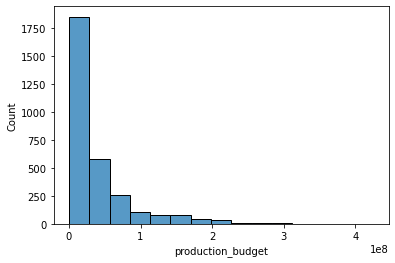

In [21]:
sns.histplot(data=filtered_df, x='production_budget',bins=15);

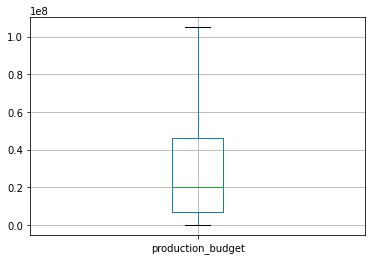

In [22]:
filtered_df.boxplot('production_budget', showfliers=False);

As we can see, our production budget in the data set is mostly left-skewed (each number is that number x 100m).

The boxplot tells us that most of the data really falls within the 100m area, with a median at 20m.

With a mean of 38,177,695.47 and a stddev of 49,792,409.08, we can see the majority of the data is heavily left-skewed, which is emphasized in the above charts.

Knowing this, at this moment standard deviation is fairly meaningless, as even a single deviation to the left will cover all data below the mean.

Let's divide the data up into three parts to make it more manageable. The first or "meat" of the data will be in a medium-ranged dataframe.

This will be everything in the 25th to 75th percentile, which is seen in the boxchart. These numbers are 7,000,000 and 46,375,000.

In [23]:
filtered_df_mid = filtered_df[(filtered_df['production_budget'] >= filt_25_percentile) & (filtered_df['production_budget'] <= filt_75_percentile)]
filtered_df_mid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1552 entries, 48 to 67
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       1552 non-null   object 
 1   movie              1552 non-null   object 
 2   production_budget  1552 non-null   float64
 3   domestic_gross     1552 non-null   float64
 4   worldwide_gross    1552 non-null   float64
 5   profit             1552 non-null   float64
 6   roi                1552 non-null   float64
 7   release_year       1552 non-null   int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 109.1+ KB


In [24]:
# filtered_df['production_budget'].hist(), filtered_df_mid['production_budget'].hist();
# Does one on top of the other

In [25]:
# fig, axs = plt.subplots(1,2)
# filtered_df['production_budget'].hist(ax=axs[0],figsize=(18,5))
# filtered_df_mid['production_budget'].hist(ax=axs[1]);
# creates graphs next to each other

## Analyzing the Data ##

We're down to 2,339 records - great.

From a table of 5782 records, we've eliminated any movie from before 2005, and any movie outside a budget of 5m-150m.

For Microsoft to enter the film industry, what's a good production budget?

In [26]:
# first let's take another look at what we still have in filtered_df
filtered_df_mid.sample(5)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,roi,release_year
id,,,,,,,,
95,"Aug 7, 2015",Ricki and the Flash,18000000.0,26839498.0,41166033.0,23166033.0,128.70,2015
26,"Aug 12, 2005",Deuce Bigalow: European Gigolo,22000000.0,22400154.0,45273464.0,23273464.0,105.79,2005
54,"Nov 6, 2009",Precious (Based on the Novel Push by Sapphire),10000000.0,47566524.0,68722848.0,58722848.0,587.23,2009
12,"Nov 16, 2012",Le prÃ©nom,11000000.0,61611.0,25307405.0,14307405.0,130.07,2012
90,"Mar 3, 2006",Aquamarine,12000000.0,18597342.0,22978953.0,10978953.0,91.49,2006


In [27]:
# basic correlation between the variables
filtered_df_mid[['production_budget', 'worldwide_gross', 'profit', 'roi']].corr()

,production_budget,worldwide_gross,profit,roi
production_budget,1.000000,0.333498,0.186407,-0.080758
worldwide_gross,0.333498,1.000000,0.988393,0.795123
profit,0.186407,0.988393,1.000000,0.841638
roi,-0.080758,0.795123,0.841638,1.000000


Let's also compare the outlier ranges of below 5 million and above 150 million.

In [28]:
filtered_df_low = filtered_df[(filtered_df['production_budget'] < filt_25_percentile)]
filtered_df_high = filtered_df[(filtered_df['production_budget'] > filt_75_percentile)]

In [29]:
filtered_df_low.sample(3)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,roi,release_year
id,,,,,,,,
49,"Sep 18, 2009",The Secrets of Jonathan Sperry,1000000.0,1355079.0,1355079.0,355079.0,35.51,2009
29,"Sep 21, 2018",Fahrenheit 11/9,5000000.0,6352306.0,6653715.0,1653715.0,33.07,2018
81,"Jul 22, 2005",November,250000.0,191862.0,191862.0,-58138.0,-23.26,2005


In [30]:
filtered_df_high.sample(3)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit,roi,release_year
id,,,,,,,,
85,"Jul 25, 2008",Step Brothers,65000000.0,100468793.0,128468793.0,63468793.0,97.64,2008
2,"Nov 22, 2017",Coco,175000000.0,209726015.0,798008101.0,623008101.0,356.00,2017
94,"Mar 11, 2011",Mars Needs Moms,150000000.0,21392758.0,39549758.0,-110450242.0,-73.63,2011


In [31]:
#print('low:',filtered_df_low[['production_budget', 'worldwide_gross', 'profit', 'roi']].corr(), '\n\n',
     # 'mid:',filtered_df_mid[['production_budget', 'worldwide_gross', 'profit', 'roi']].corr(), '\n\n',
     # 'high:',filtered_df_high[['production_budget', 'worldwide_gross', 'profit', 'roi']].corr())

In [32]:
filtered_df_low[['production_budget', 'worldwide_gross', 'profit', 'roi']].corr()

,production_budget,worldwide_gross,profit,roi
production_budget,1.000000,0.259575,0.195296,-0.093202
worldwide_gross,0.259575,1.000000,0.997821,0.439776
profit,0.195296,0.997821,1.000000,0.452983
roi,-0.093202,0.439776,0.452983,1.000000


In [33]:
filtered_df_mid[['production_budget', 'worldwide_gross', 'profit', 'roi']].corr()

,production_budget,worldwide_gross,profit,roi
production_budget,1.000000,0.333498,0.186407,-0.080758
worldwide_gross,0.333498,1.000000,0.988393,0.795123
profit,0.186407,0.988393,1.000000,0.841638
roi,-0.080758,0.795123,0.841638,1.000000


In [34]:
filtered_df_high[['production_budget', 'worldwide_gross', 'profit', 'roi']].corr()

,production_budget,worldwide_gross,profit,roi
production_budget,1.000000,0.683657,0.565524,0.122658
worldwide_gross,0.683657,1.000000,0.988517,0.711479
profit,0.565524,0.988517,1.000000,0.778626
roi,0.122658,0.711479,0.778626,1.000000


So, what we can see from the above correlations?

It appears in these ranges, the higher the budget the higher the profit. So, is spending an absurd amount of money the way to succesfully break into the film industry?

Let's keep digging.

## ROI ##

Using this as a stand-in for our profit margin, aka our profit percentage, let's look at the statistics on the ROI for each of these groups.

In [35]:
filtered_df_low.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 750 entries, 73 to 82
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       750 non-null    object 
 1   movie              750 non-null    object 
 2   production_budget  750 non-null    float64
 3   domestic_gross     750 non-null    float64
 4   worldwide_gross    750 non-null    float64
 5   profit             750 non-null    float64
 6   roi                750 non-null    float64
 7   release_year       750 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 52.7+ KB


In [36]:
filtered_df_mid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1552 entries, 48 to 67
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       1552 non-null   object 
 1   movie              1552 non-null   object 
 2   production_budget  1552 non-null   float64
 3   domestic_gross     1552 non-null   float64
 4   worldwide_gross    1552 non-null   float64
 5   profit             1552 non-null   float64
 6   roi                1552 non-null   float64
 7   release_year       1552 non-null   int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 109.1+ KB


In [37]:
filtered_df_high.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 1 to 43
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       768 non-null    object 
 1   movie              768 non-null    object 
 2   production_budget  768 non-null    float64
 3   domestic_gross     768 non-null    float64
 4   worldwide_gross    768 non-null    float64
 5   profit             768 non-null    float64
 6   roi                768 non-null    float64
 7   release_year       768 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 54.0+ KB


In [38]:
print(f"""We're going to look at the three different DataFrames and their means, medians and standard deviations.\nWe'll also check their ranges. \n\n
Low end mean: {round(filtered_df_low['roi'].mean(), 2)}, Low end median: {round(filtered_df_low['roi'].median(), 2)}, Low end standard deviation: {round(filtered_df_low['roi'].std(), 2)},\nLow end range is {round(filtered_df_low['roi'].min(), 2)} to {round(filtered_df_low['roi'].max(), 2)}. \n\n
Medium range mean: {round(filtered_df_mid['roi'].mean(), 2)}, Medium range median: {round(filtered_df_mid['roi'].median(),2)}, Medium standard deviation: {round(filtered_df_mid['roi'].std(), 2)},\nMedium range is {round(filtered_df_mid['roi'].min(), 2)} to {round(filtered_df_mid['roi'].max(), 2)}. \n\n
High end mean: {round(filtered_df_high['roi'].mean(), 2)}. High end median: {filtered_df_high['roi'].median()}, High end standard deviation: {round(filtered_df_high['roi'].std(), 2)},\nHigh end range is {round(filtered_df_high['roi'].min(), 2)} to {round(filtered_df_high['roi'].max(), 2)}.""")

We're going to look at the three different DataFrames and their means, medians and standard deviations.
We'll also check their ranges. 


Low end mean: 514.08, Low end median: 3.42, Low end standard deviation: 2534.68,
Low end range is -100.0 to 43051.79. 


Medium range mean: 177.86, Medium range median: 75.37, Medium standard deviation: 361.53,
Medium range is -99.99 to 4389.57. 


High end mean: 190.45. High end median: 138.49, High end standard deviation: 219.86,
High end range is -99.95 to 1527.25.


These are some funky numbers to say the least. What do the charts tell us about the distribution of the ROIs?

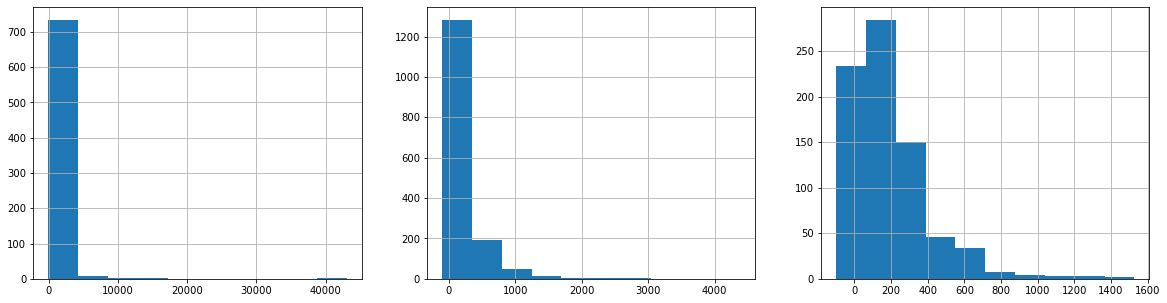

In [39]:
fig, axs = plt.subplots(1,3)
filtered_df_low['roi'].hist(ax=axs[0],figsize=(20,5))
filtered_df_mid['roi'].hist(ax=axs[1],figsize=(20,5))
filtered_df_high['roi'].hist(ax=axs[2],figsize=(20,5));

This confirms what we saw earlier:

All have fairly large ranges on their ROI, especially on the low end of budgets.

Let's first get rid of anything that is outside 1 standard deviation of their respective mean.

Afterwards, we'll build another histogram matrix to see if we're seeing anything better.

In [40]:
low_st = round(filtered_df_low['roi'].std(), 2)
mid_st = round(filtered_df_mid['roi'].std(), 2)
high_st = round(filtered_df_high['roi'].std(), 2)
low_mean = round(filtered_df_low['roi'].mean(), 2)
mid_mean = round(filtered_df_mid['roi'].mean(), 2)
high_mean = round(filtered_df_high['roi'].mean(), 2)

low_dev_min = (low_mean-low_st)
low_dev_max = (low_mean+low_st)
mid_dev_min = (mid_mean-mid_st)
mid_dev_max = (mid_mean+mid_st)
high_dev_min = (high_mean-high_st)
high_dev_max = (high_mean+high_st)

In [41]:
filtered_df_low2 = filtered_df_low[(filtered_df_low['roi'] >= low_dev_min) & (filtered_df_low['roi'] <= low_dev_max)]

In [42]:
filtered_df_low2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 727 entries, 73 to 80
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       727 non-null    object 
 1   movie              727 non-null    object 
 2   production_budget  727 non-null    float64
 3   domestic_gross     727 non-null    float64
 4   worldwide_gross    727 non-null    float64
 5   profit             727 non-null    float64
 6   roi                727 non-null    float64
 7   release_year       727 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 51.1+ KB


In [43]:
filtered_df_mid2 = filtered_df_mid[(filtered_df_mid['roi'] >= mid_dev_min) & (filtered_df_mid['roi'] <= mid_dev_max)]

In [44]:
filtered_df_mid2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1394 entries, 48 to 67
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       1394 non-null   object 
 1   movie              1394 non-null   object 
 2   production_budget  1394 non-null   float64
 3   domestic_gross     1394 non-null   float64
 4   worldwide_gross    1394 non-null   float64
 5   profit             1394 non-null   float64
 6   roi                1394 non-null   float64
 7   release_year       1394 non-null   int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 98.0+ KB


In [45]:
filtered_df_high2 = filtered_df_high[(filtered_df_high['roi'] >= high_dev_min) & (filtered_df_high['roi'] <= high_dev_max)]

In [46]:
filtered_df_high2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 618 entries, 2 to 38
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       618 non-null    object 
 1   movie              618 non-null    object 
 2   production_budget  618 non-null    float64
 3   domestic_gross     618 non-null    float64
 4   worldwide_gross    618 non-null    float64
 5   profit             618 non-null    float64
 6   roi                618 non-null    float64
 7   release_year       618 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 43.5+ KB


This has removed 23/750, 158/1552, and 150/768 data points from the low, medium and high dataframes, respectively.

We'll see in the below histograms that these new histograms, while still skewed, have started to take a more central structure, especially the high budget dataframe.

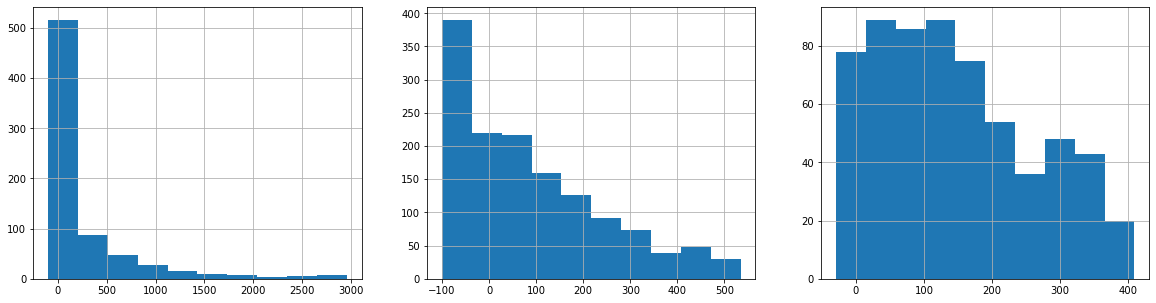

In [47]:
fig, axs = plt.subplots(1,3)
filtered_df_low2['roi'].hist(ax=axs[0],figsize=(20,5))
filtered_df_mid2['roi'].hist(ax=axs[1],figsize=(20,5))
filtered_df_high2['roi'].hist(ax=axs[2],figsize=(20,5));

In [48]:
frames = [filtered_df_low2, filtered_df_mid2, filtered_df_high2]
filtered_df_total = pd.concat(frames)

In [49]:
# a combo of all filtered total data
filtered_df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2739 entries, 73 to 38
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       2739 non-null   object 
 1   movie              2739 non-null   object 
 2   production_budget  2739 non-null   float64
 3   domestic_gross     2739 non-null   float64
 4   worldwide_gross    2739 non-null   float64
 5   profit             2739 non-null   float64
 6   roi                2739 non-null   float64
 7   release_year       2739 non-null   int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 192.6+ KB


It seems the 75th+ percentile of data points are the most "average" looking.

## ROI to Production Budget ##

In [50]:
filtered_df_low2 = filtered_df_low2.sort_values('roi', ascending=False)

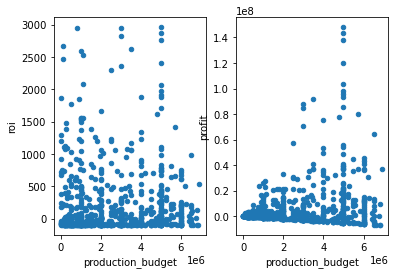

In [51]:
fig, axs = plt.subplots(1,2)
filtered_df_low2.plot.scatter(x='production_budget',y='roi',ax=axs[0])
filtered_df_low2.plot.scatter(x='production_budget',y='profit',ax=axs[1]);

In [52]:
filtered_df_low2.corr()

,production_budget,domestic_gross,worldwide_gross,profit,roi,release_year
production_budget,1.000000,0.292148,0.349736,0.253353,0.009746,0.070419
domestic_gross,0.292148,1.000000,0.888529,0.885993,0.702748,0.156135
worldwide_gross,0.349736,0.888529,1.000000,0.994889,0.763506,0.119874
profit,0.253353,0.885993,0.994889,1.000000,0.787333,0.116190
roi,0.009746,0.702748,0.763506,0.787333,1.000000,0.070125
release_year,0.070419,0.156135,0.119874,0.116190,0.070125,1.000000


In [53]:
filtered_df_mid2 = filtered_df_mid2.sort_values('roi', ascending=False)

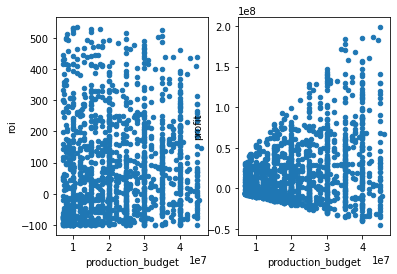

In [54]:
fig, axs = plt.subplots(1,2)
filtered_df_mid2.plot.scatter(x='production_budget',y='roi',ax=axs[0])
filtered_df_mid2.plot.scatter(x='production_budget',y='profit',ax=axs[1]);

In [55]:
filtered_df_mid2.corr()

,production_budget,domestic_gross,worldwide_gross,profit,roi,release_year
production_budget,1.000000,0.459125,0.541706,0.328625,0.091774,0.005038
domestic_gross,0.459125,1.000000,0.856774,0.834098,0.707023,0.035249
worldwide_gross,0.541706,0.856774,1.000000,0.971901,0.795215,0.016121
profit,0.328625,0.834098,0.971901,1.000000,0.867802,0.016703
roi,0.091774,0.707023,0.795215,0.867802,1.000000,0.016291
release_year,0.005038,0.035249,0.016121,0.016703,0.016291,1.000000


In [56]:
filtered_df_high2 = filtered_df_high2.sort_values('roi', ascending=False)

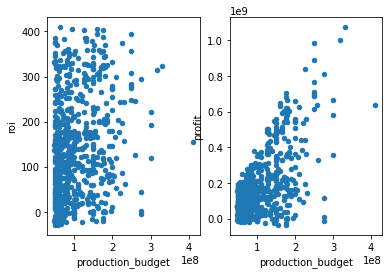

In [57]:
fig, axs = plt.subplots(1,2)
filtered_df_high2.plot.scatter(x='production_budget',y='roi',ax=axs[0])
filtered_df_high2.plot.scatter(x='production_budget',y='profit',ax=axs[1]);

In [58]:
filtered_df_high2.corr()

,production_budget,domestic_gross,worldwide_gross,profit,roi,release_year
production_budget,1.000000,0.688604,0.790218,0.659937,0.208846,0.154383
domestic_gross,0.688604,1.000000,0.906875,0.899137,0.667207,0.076139
worldwide_gross,0.790218,0.906875,1.000000,0.981923,0.695014,0.189479
profit,0.659937,0.899137,0.981923,1.000000,0.787578,0.184617
roi,0.208846,0.667207,0.695014,0.787578,1.000000,0.176234
release_year,0.154383,0.076139,0.189479,0.184617,0.176234,1.000000


So, it seems the higher a production budget, the more likely a positive profit margin.

A higher production budget also has a fairly strong positive correlation with straight profit numbers.

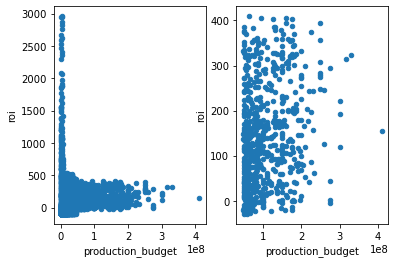

In [59]:
fig, axs = plt.subplots(1,2)
filtered_df_total.plot.scatter(x='production_budget', y='roi',ax=axs[0])
filtered_df_high2.plot.scatter(x='production_budget', y='roi', ax=axs[1]);

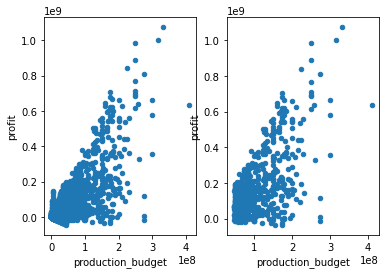

In [60]:
fig, axs = plt.subplots(1,2)
filtered_df_total.plot.scatter(x='production_budget', y='profit',ax=axs[0])
filtered_df_high2.plot.scatter(x='production_budget', y='profit', ax=axs[1]);

In [61]:
filtered_df_total.corr()

,production_budget,domestic_gross,worldwide_gross,profit,roi,release_year
production_budget,1.000000,0.824764,0.880453,0.765460,0.007880,0.087718
domestic_gross,0.824764,1.000000,0.939389,0.920705,0.203684,0.076684
worldwide_gross,0.880453,0.939389,1.000000,0.979048,0.180694,0.108831
profit,0.765460,0.920705,0.979048,1.000000,0.241850,0.110031
roi,0.007880,0.203684,0.180694,0.241850,1.000000,0.052801
release_year,0.087718,0.076684,0.108831,0.110031,0.052801,1.000000


In [62]:
filtered_df_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2739 entries, 73 to 38
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       2739 non-null   object 
 1   movie              2739 non-null   object 
 2   production_budget  2739 non-null   float64
 3   domestic_gross     2739 non-null   float64
 4   worldwide_gross    2739 non-null   float64
 5   profit             2739 non-null   float64
 6   roi                2739 non-null   float64
 7   release_year       2739 non-null   int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 192.6+ KB


In [63]:
filtered_df_total.describe()

,production_budget,domestic_gross,worldwide_gross,profit,roi,release_year
count,2.739000e+03,2.739000e+03,2.739000e+03,2.739000e+03,2739.000000,2739.000000
mean,3.619140e+07,3.610581e+07,8.659292e+07,5.040151e+07,136.031303,2011.151880
std,4.800636e+07,5.633108e+07,1.517050e+08,1.117796e+08,309.353642,3.931425
min,5.000000e+03,0.000000e+00,2.600000e+01,-4.492629e+07,-100.000000,2005.000000
25%,6.000000e+06,7.976370e+05,4.345850e+06,-1.963216e+06,-44.430000,2008.000000
50%,2.000000e+07,1.482856e+07,3.049138e+07,1.015990e+07,65.450000,2011.000000
75%,4.000000e+07,4.735278e+07,9.564291e+07,5.397160e+07,209.145000,2014.000000
max,4.106000e+08,6.201814e+08,1.403014e+09,1.072414e+09,2958.500000,2019.000000


In [64]:
filtered_df_low2.describe()

,production_budget,domestic_gross,worldwide_gross,profit,roi,release_year
count,7.270000e+02,7.270000e+02,7.270000e+02,7.270000e+02,727.000000,727.000000
mean,2.686597e+06,4.410378e+06,8.796299e+06,6.109702e+06,223.643205,2011.061898
std,1.931967e+06,1.047022e+07,1.850945e+07,1.792539e+07,538.789956,3.838010
min,5.000000e+03,0.000000e+00,2.600000e+01,-6.817727e+06,-100.000000,2005.000000
25%,1.000000e+06,2.811700e+04,1.157355e+05,-1.392600e+06,-90.360000,2008.000000
50%,2.300000e+06,3.733750e+05,1.392649e+06,-1.218400e+04,-3.680000,2011.000000
75%,4.500000e+06,3.421824e+06,9.279559e+06,5.486834e+06,281.730000,2014.000000
max,6.900000e+06,8.702509e+07,1.529251e+08,1.479251e+08,2958.500000,2019.000000


In [65]:
filtered_df_mid2.describe()

,production_budget,domestic_gross,worldwide_gross,profit,roi,release_year
count,1.394000e+03,1.394000e+03,1.394000e+03,1.394000e+03,1394.000000,1394.000000
mean,2.224376e+07,2.234501e+07,4.291883e+07,2.067507e+07,85.989799,2011.015782
std,1.078945e+07,2.428064e+07,4.329112e+07,3.852902e+07,156.419699,3.914342
min,7.000000e+06,0.000000e+00,1.242000e+03,-4.492629e+07,-99.990000,2005.000000
25%,1.300000e+07,2.438706e+06,9.689645e+06,-7.019894e+06,-47.620000,2008.000000
50%,2.000000e+07,1.500303e+07,3.042150e+07,9.928454e+06,51.615000,2011.000000
75%,3.000000e+07,3.449725e+07,6.247372e+07,3.680275e+07,174.992500,2014.000000
max,4.600000e+07,1.595816e+08,2.431809e+08,1.981809e+08,534.110000,2019.000000


In [66]:
filtered_df_high2.describe()

,production_budget,domestic_gross,worldwide_gross,profit,roi,release_year
count,6.180000e+02,6.180000e+02,6.180000e+02,6.180000e+02,618.000000,618.000000
mean,1.070668e+08,1.044313e+08,2.766250e+08,1.695582e+08,145.843608,2011.564725
std,5.626751e+07,7.958566e+07,2.233449e+08,1.821744e+08,114.283686,4.054713
min,4.700000e+07,0.000000e+00,3.538092e+07,-3.536966e+07,-29.240000,2005.000000
25%,6.000000e+07,4.766072e+07,1.195517e+08,3.976152e+07,48.085000,2008.000000
50%,8.500000e+07,8.180032e+07,2.066132e+08,1.158117e+08,126.050000,2012.000000
75%,1.450000e+08,1.342985e+08,3.549954e+08,2.270261e+08,226.052500,2015.000000
max,4.106000e+08,6.201814e+08,1.403014e+09,1.072414e+09,409.120000,2019.000000


## Conclusion ##

A lot of data has been thrown above, here is the quick rundown of what was just done:

1. We started with the raw data from The Numbers database, containing about 5,700 records.

2. We filtered out any records containing 0 values in the worldwide_gross as they would harm our data.

3. We created three columns: profit, roi (profit margin/percentage), and release year.

4. We filtered our data to contain only movies released in the last decade of records (2005-2016).

5. We posited that a higher budget returns a greater raw profit and a greater profit percentage on average.

6. We noticed the large left-skew in our data, so we split it into three dataframes.
    a. We used IQR to determine the splits

7. We used standard deviation to try and knock out a few outliers, though it only affected the right side of the dataframes.

8. With our new dataframes, we looked at the correlations between the budget and profit/roi.
    a. Due to the skew, Median is a better measure of central tendancy when looking at this number than Mean.
    
9. We notice that the higher-budget of the three dataframes had the highest correlation between budget and profit/roi.
    a. It was still a weak positive correlation with ROI of only 20%
    b. The budget to profit correlation was significantly positive

10. We can conclude that, on average, a higher budget will lead to a larger profit, and will likely lead to a higher profit margin. 